# Problem Statement :
### A samplesuperstore data is given, as a business manager we need to find the weak areas , where we can work to make more profits, and what all business problems we can derive by exploring the data.

# import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [2]:
data = pd.read_csv('SampleSuperstore.csv')

## Basic Features of data 

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
data['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

In [8]:
data['City'].value_counts()

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

In [9]:
data['State'].value_counts()

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

In [10]:
data['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

# Exploratory Data Analysis

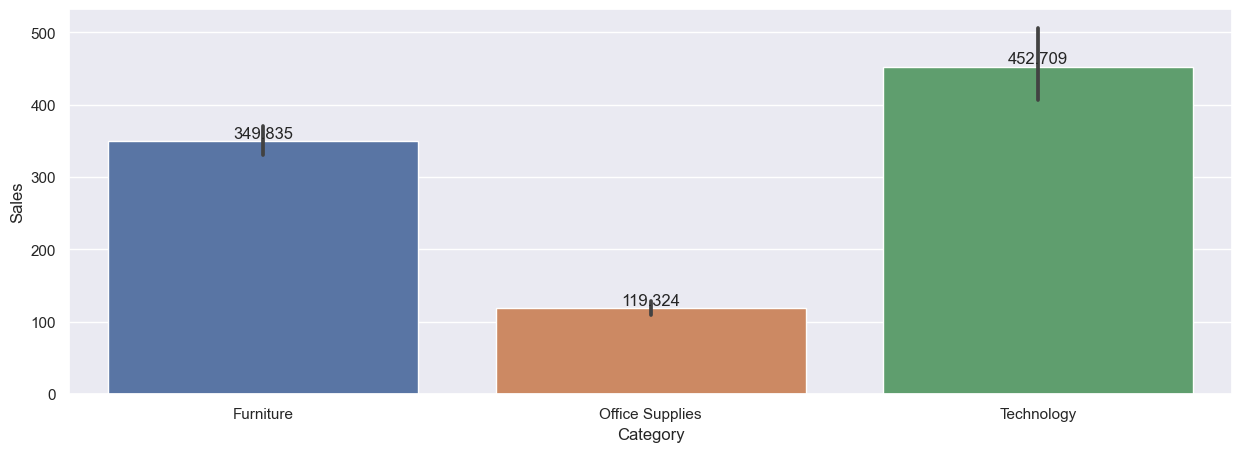

In [36]:
ax11=sns.barplot(x=data['Category'],y=data['Sales'])
for bars in ax11.containers:
    ax11.bar_label(bars)

<Axes: xlabel='Category'>

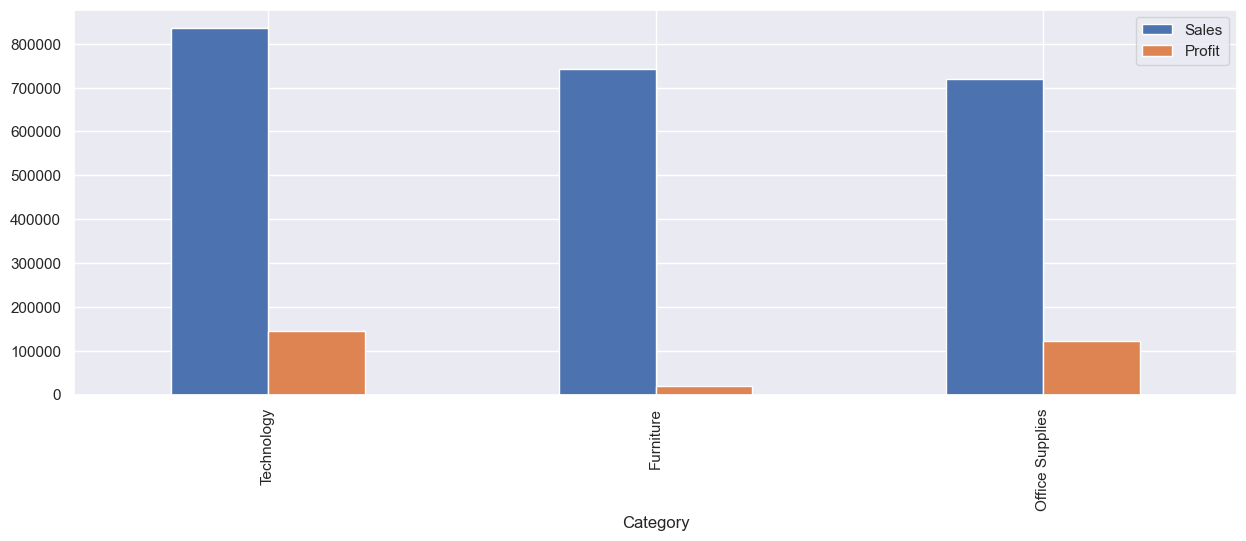

In [38]:
data5=data.groupby('Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)

data5.plot.bar()

### Conclusion 1 : In technology category we got the maximum Sales with maximum profit.
### Conclusion 2 : Funiture Category has less profit than office supplies category.

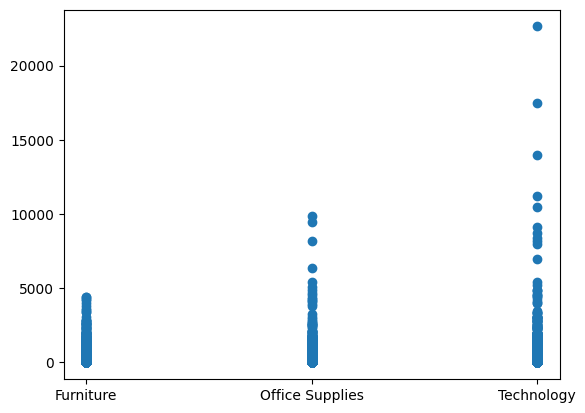

In [11]:
plt.scatter(data['Category'],data['Sales'])

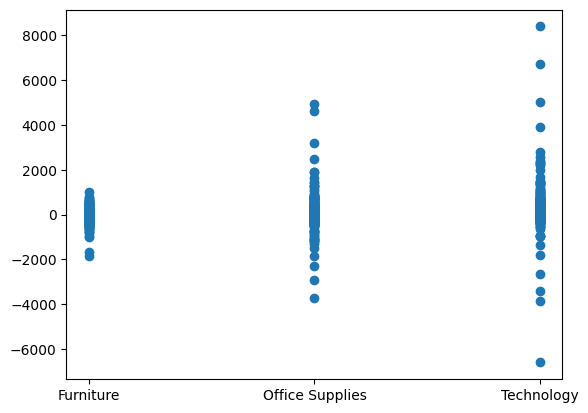

In [12]:
plt.scatter(data['Category'],data['Profit'])

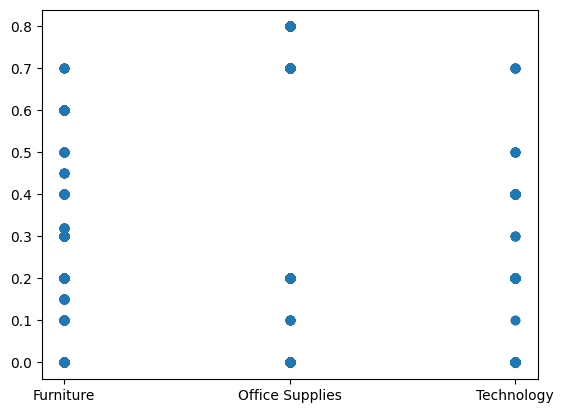

In [13]:
plt.scatter(data['Category'],data['Discount'])

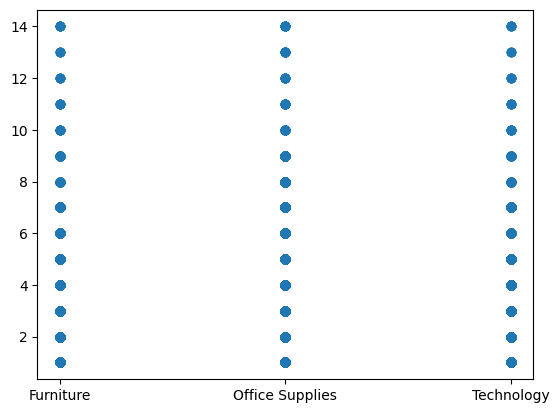

In [14]:
plt.scatter(data['Category'],data['Quantity'])

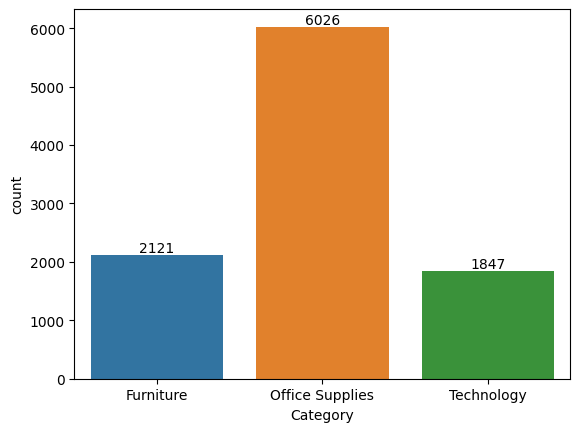

In [15]:
ax=sns.countplot(x='Category', data=data)
for bars in ax.containers:
    ax.bar_label(bars)

### Conclusion 3: Office supplies category has maximum number of items sold.

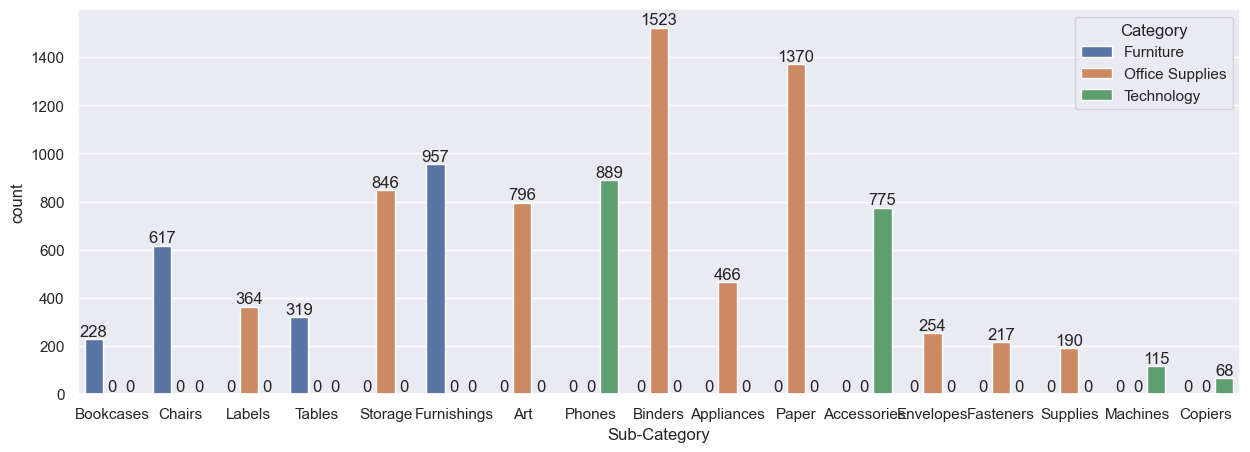

In [16]:
sns.set(rc={'figure.figsize':(15,5)})
ax1=sns.countplot(x='Sub-Category', hue='Category', data=data)
for bars in ax1.containers:
    ax1.bar_label(bars)

### Conclusion 4 : In technology Category phones and Accessories have maximum number to be sold while in office supplies category paper and binders are maximum sold.

<Axes: xlabel='Ship Mode', ylabel='count'>

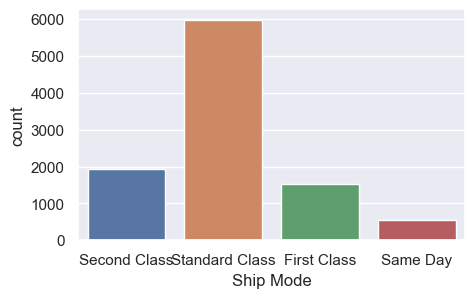

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Ship Mode'])

### Conclusion 5 : Standard Class ship mode is most commonly used . 

In [18]:
data['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

In [19]:
#sns.set(rc={'figure.figsize':(15,5)})
#ax2=sns.countplot(x='Sales', hue='State', data=data)
#plt.xticks(rotation = 90)
#for bars in ax2.containers:
 #   ax2.bar_label(bars)

In [20]:
data1=data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)

<Axes: xlabel='State'>

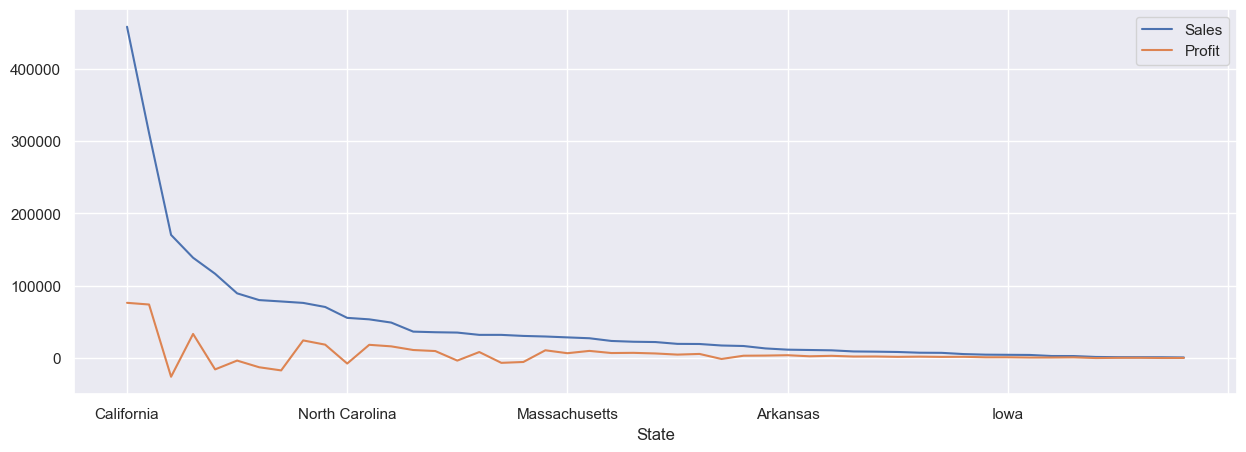

In [21]:
data1.plot()

<Axes: xlabel='State'>

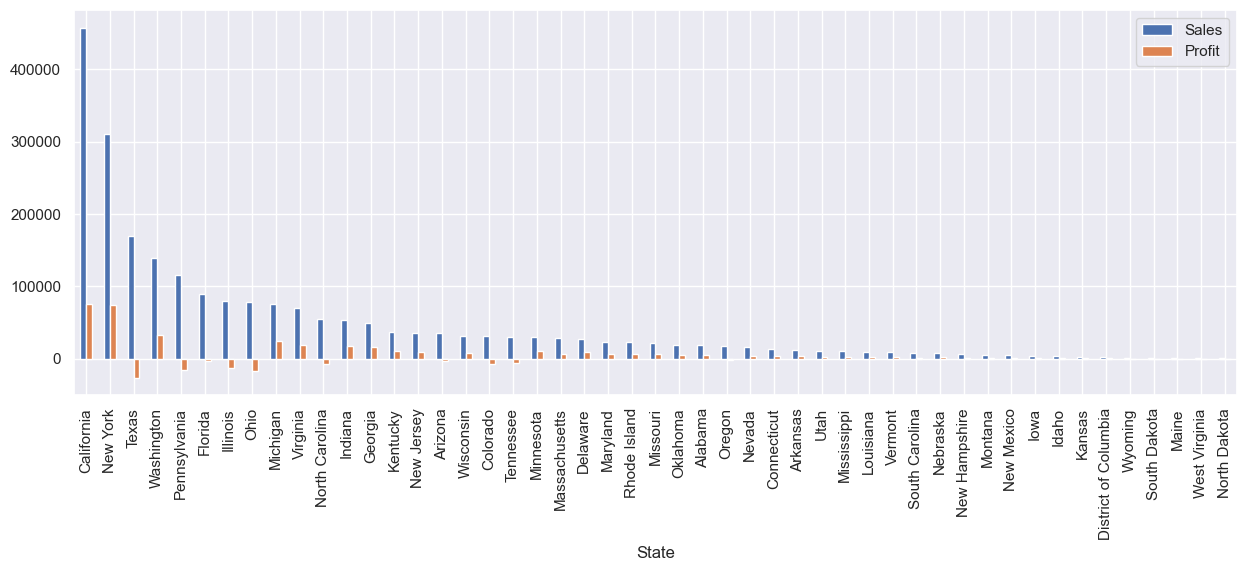

In [23]:
data1.plot.bar()

### Concusion 6: In state California both profit and sales is maximum while some states like Texas , Pennsylvania, Ohio , North Carolina have profit in negative numbers.

In [25]:
data2=data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)

<Axes: xlabel='Sub-Category'>

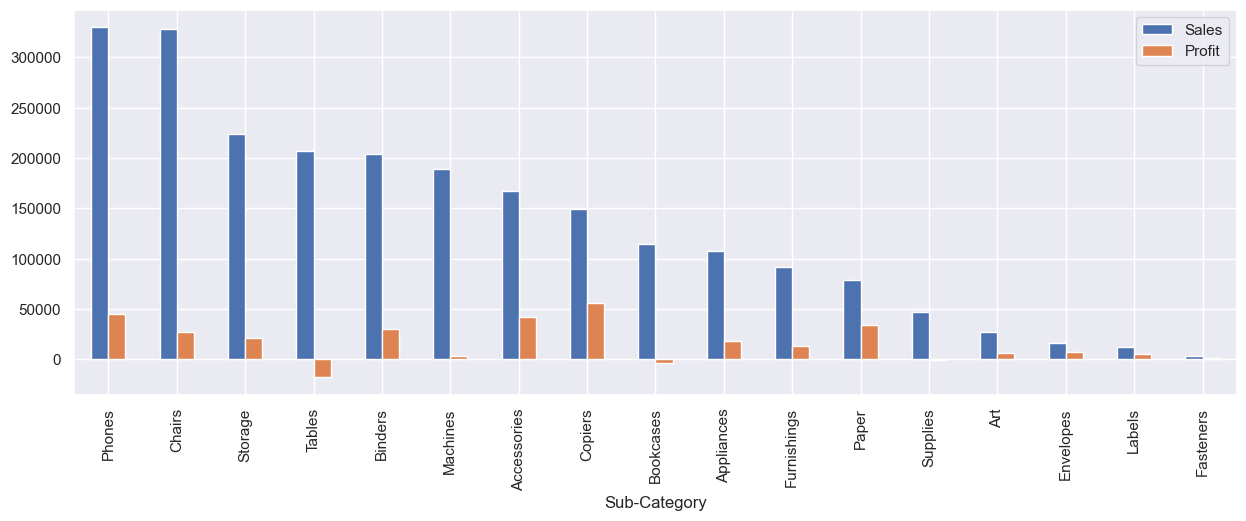

In [26]:
data2.plot.bar()

### Conclusion 7 : In sub- categories like tables and book cases we have no profits and going on loss.

In [27]:
data3=data.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)

<Axes: xlabel='Region'>

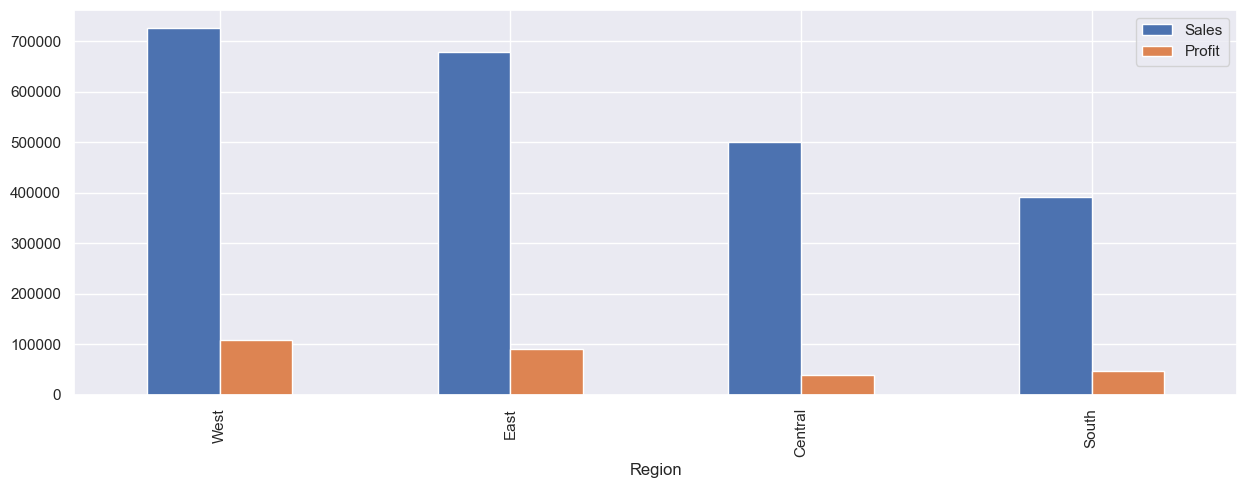

In [28]:
data3.plot.bar()

### Conclusion 8 : in central region store has least profit.

In [29]:
data4=data.groupby('Segment')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)

<Axes: xlabel='Segment'>

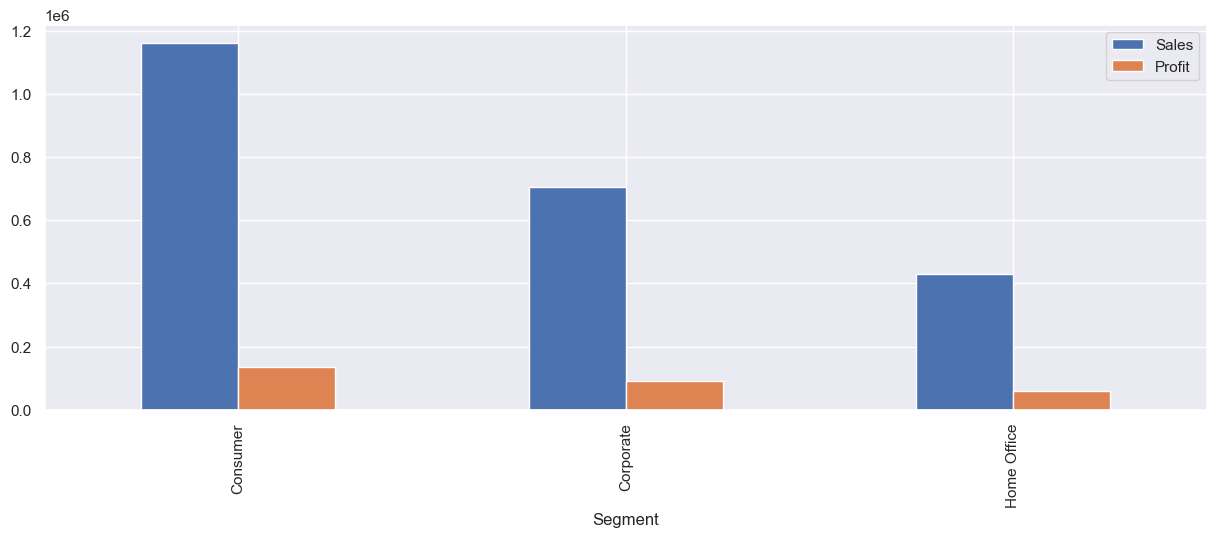

In [30]:
data4.plot.bar()

<Axes: title={'center': 'segment vise sales in each region'}, xlabel='Region', ylabel='Sales'>

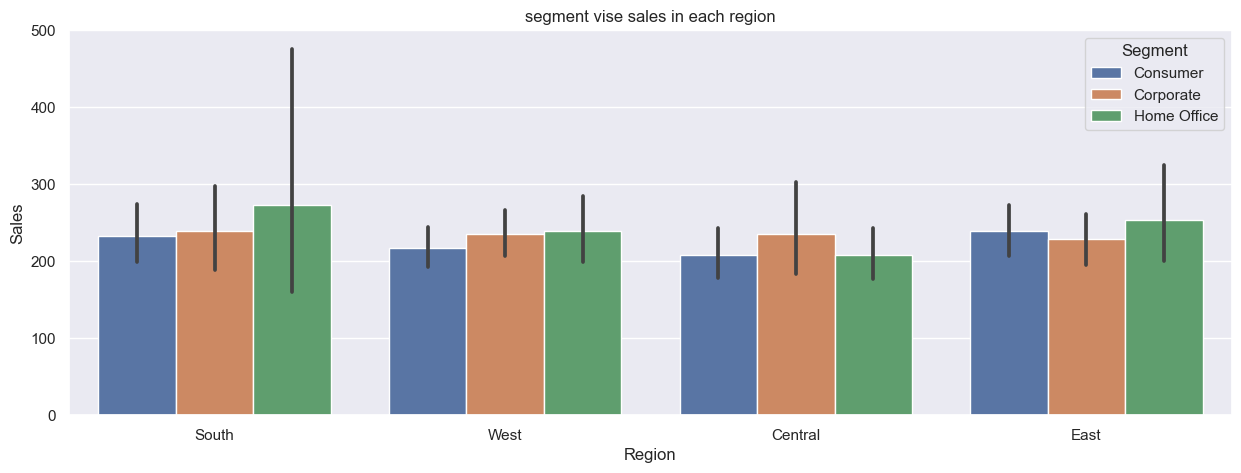

In [33]:
plt.title('segment vise sales in each region')
sns.barplot(x='Region',y='Sales',hue='Segment',data=data)